<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%80%D0%BA%D0%B5%D1%80%D0%BE%D0%B2_ArUco_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_OpenCV_%D0%B8_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;"><b>Распознавание маркеров ArUco с помощью OpenCV и Python</b></h1>

<h1 style = "text-align: center;"> <b> Detecting ArUco markers with OpenCV and Python </b> </h1>

В этом уроке вы узнаете, как обнаруживать маркеры ArUco в изображениях и видео в реальном времени с помощью OpenCV и Python.

In this tutorial, you will learn how to detect ArUco markers in images and live video using OpenCV and Python.

Обнаруживать маркеры ArUco в изображениях и видеопотоках в реальном времени мы будем с помощью:

We will detect ArUco markers in images and video streams in real time using:





*   Указания словаря ArUco. ArUco dictionary directions
*   Создание параметров для детектора ArUco (обычно это всего одна строка кода со значениями по умолчанию). Create parameters for ArUco detector (usually just one line of code with default values)
*   Применяя cv2.aruco.detectMarkers для фактического обнаружения маркеров ArUco в вашем изображении или видеопотоке. Applying cv2.aruco.detectMarkers to actually detect ArUco markers in your image or video stream



### Скачать zip-файл с кодом


### Download the code zip file

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_5.Detecting_ArUco_markers.zip
!unzip -qq Lesson_5.Detecting_ArUco_markers.zip
%cd /content/Lesson_5.Detecting_ArUco_markers/opencv-detect-aruco

--2022-02-11 06:48:17--  http://dataudt.ru/datasets/cv/Lesson_5.Detecting_ArUco_markers.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22228949 (21M) [application/zip]
Saving to: ‘Lesson_5.Detecting_ArUco_markers.zip’

Lesson_5.Detecting_ 100%[===================>]  21.20M  11.2MB/s    in 1.9s    

2022-02-11 06:48:20 (11.2 MB/s) - ‘Lesson_5.Detecting_ArUco_markers.zip’ saved [22228949/22228949]

/content/Lesson_5.Detecting_ArUco_markers/opencv-detect-aruco


### Импортируем пакеты

### Import Packages

In [2]:
# импортируем необходимые библиотеки
# import the necessary packages
from imutils.video import VideoStream
import matplotlib.pyplot as plt
import imutils
import time
import cv2
import sys

### Функция для отображения изображений в блокнотах Jupyter Notebooks и Google Colab

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
    # конвертируем изображение из формата BGR в RGB и отображаем его 
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Обнаружение маркеров ArUco с помощью OpenCV на изображениях

### Detecting ArUco markers with OpenCV in images

In [4]:


# явно укажем аргументы необходимые для работы
# image - исходное изображение
# type - тег ArUCo

# explicitly specify the arguments needed to work
# image - source image
# type - ArUCo tag
args = {
    "image": "images/example_01.png", 
    "type": "DICT_5X5_100", 
}

In [5]:
# определяем имена для каждого возможного тега ArUco, поддерживаемого OpenCV
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [6]:
# загружаем входное изображение и изменяем его размер
# load the input image from disk and resize it
print("[INFO] loading image...")
image = cv2.imread(args["image"])
image = imutils.resize(image, width=600)


# проверяем, что предоставленный тег ArUCo существует и поддерживается OpenCV
# verify that the supplied ArUCo tag exists and is supported by
# OpenCV
if ARUCO_DICT.get(args["type"], None) is None:
	print("[INFO] ArUCo tag of '{}' is not supported".format(
		args["type"]))
	sys.exit(0)

# загружаем словарь ArUCo, находим параметры и маркеры
# load the ArUCo dictionary, grab the ArUCo parameters, and detect
# the markers
print("[INFO] detecting '{}' tags...".format(args["type"]))
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT[args["type"]])
arucoParams = cv2.aruco.DetectorParameters_create()
(corners, ids, rejected) = cv2.aruco.detectMarkers(image, arucoDict,
	parameters=arucoParams)

[INFO] loading image...
[INFO] detecting 'DICT_5X5_100' tags...


[INFO] ArUco marker ID: 42


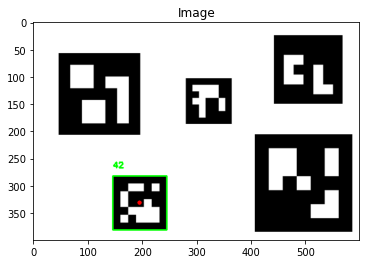

[INFO] ArUco marker ID: 24


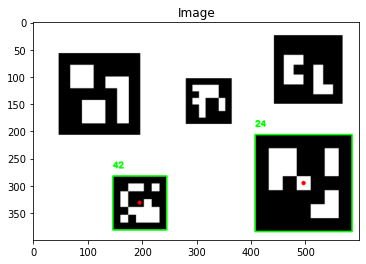

[INFO] ArUco marker ID: 70


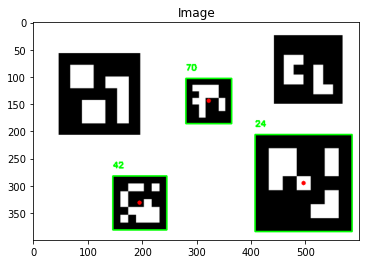

[INFO] ArUco marker ID: 66


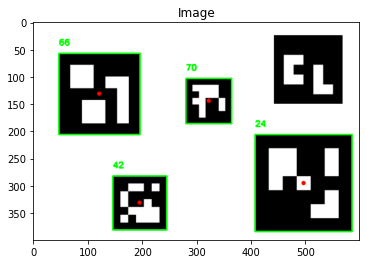

[INFO] ArUco marker ID: 87


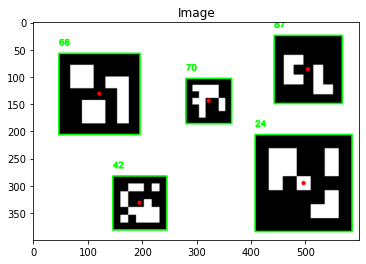

In [7]:
# удеждаемся, что хотя один маркер был обнаружен
# verify *at least* one ArUco marker was detected
if len(corners) > 0:
    # выравниваем список идентификаторов ArUco
	# flatten the ArUco IDs list
	ids = ids.flatten()

    # перебираем обнаруженные углы ArUCo
	# loop over the detected ArUCo corners
	for (markerCorner, markerID) in zip(corners, ids):
        # извлекаем углы маркера (которые всегда возвращаются
		# в верхнем левом, верхнем правом, нижнем правом и нижнем левом порядке)
		# extract the marker corners (which are always returned in
		# top-left, top-right, bottom-right, and bottom-left order)
		corners = markerCorner.reshape((4, 2))
		(topLeft, topRight, bottomRight, bottomLeft) = corners

        # преобразовываем каждую из пар координат (x, y) в целые числа
		# convert each of the (x, y)-coordinate pairs to integers
		topRight = (int(topRight[0]), int(topRight[1]))
		bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
		bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
		topLeft = (int(topLeft[0]), int(topLeft[1]))

        # рисуем ограничивающую рамку обнаружения ArUCo
		# draw the bounding box of the ArUCo detection
		cv2.line(image, topLeft, topRight, (0, 255, 0), 2)
		cv2.line(image, topRight, bottomRight, (0, 255, 0), 2)
		cv2.line(image, bottomRight, bottomLeft, (0, 255, 0), 2)
		cv2.line(image, bottomLeft, topLeft, (0, 255, 0), 2)

        # вычисляем и рисуем центральные (x, y) - координаты маркера  ArUco
		# compute and draw the center (x, y)-coordinates of the ArUco
		# marker
		cX = int((topLeft[0] + bottomRight[0]) / 2.0)
		cY = int((topLeft[1] + bottomRight[1]) / 2.0)
		cv2.circle(image, (cX, cY), 4, (0, 0, 255), -1)

        # рисуем идентификатор маркера ArUco на изображении
		# draw the ArUco marker ID on the image
		cv2.putText(image, str(markerID),
			(topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, (0, 255, 0), 2)
		print("[INFO] ArUco marker ID: {}".format(markerID))

        # отображаем выходное изображение
		# show the output image
		plt_imshow("Image", image)

### Обнаружение маркеров ArUco в видеопотоках в реальном времени с помощью OpenCV

### Detecting ArUco markers in real-time video streams with OpenCV

In [8]:
# явно укажем аргументы необходимые для работы
# type - тип метки ArUCo для обнаружения
# video - входное видео 
# output - выходное видео 

# explicitly specify the arguments needed to work
# type - type of ArUCo tag to detect
# video - input video 
# output - output video 
args = {
    "type": "DICT_ARUCO_ORIGINAL",
    "video": "aruco_sample.mp4",
    "output": "output.avi"
}

In [9]:
# определяем имена для каждого возможного тега ArUco, поддерживаемого OpenCV
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [10]:
# проверяем, что предоставленный тег ArUCo существует и поддерживается OpenCV
# verify that the supplied ArUCo tag exists and is supported by
# OpenCV
if ARUCO_DICT.get(args["type"], None) is None:
	print("[INFO] ArUCo tag of '{}' is not supported".format(
		args["type"]))
	sys.exit(0)

# загружаем словарь ArUCo, находим параметры
# load the ArUCo dictionary and grab the ArUCo parameters
print("[INFO] detecting '{}' tags...".format(args["type"]))
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT[args["type"]])
arucoParams = cv2.aruco.DetectorParameters_create()

# инициализируем видео, указываем на выходной видеофайл и размер кадра
# initialize the video stream, pointer to output video file, and
# frame dimensions
vs = cv2.VideoCapture(args["video"])
writer = None
(W, H) = (None, None)

# пытаемся определить общее количество кадров в видеофайле
# try to determine the total number of frames in the video file
try:
	prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() \
		else cv2.CAP_PROP_FRAME_COUNT
	total = int(vs.get(prop))
	print("[INFO] {} total frames in video".format(total))

# если произошла ошибка при попытке определить общее количество кадров в видеофайле
# an error occurred while trying to determine the total
# number of frames in the video file
except:
	print("[INFO] could not determine # of frames in video")
	print("[INFO] no approx. completion time can be provided")
	total = -1

[INFO] detecting 'DICT_ARUCO_ORIGINAL' tags...
[INFO] 372 total frames in video


In [11]:
# перебираем все кадры из видео
# loop over the frames from the video stream
while True:
    # читаем следующий кадр из файла
	# read the next frame from the file
	(grabbed, frame) = vs.read()
 
    # если кадр не был захвачен, значит мы посмотрели все кадры
	# if the frame was not grabbed, then we have reached the end
	# of the stream
	if not grabbed:
		break

    # изменим размер кадра на максимальную ширину 600 пикселей
	# resize the frame to have a maximum width of 600 pixels
	frame = imutils.resize(frame, width=600)

    # обнаруживаем маркеры ArUco во входной рамке
	# detect ArUco markers in the input frame
	(corners, ids, rejected) = cv2.aruco.detectMarkers(frame,
		arucoDict, parameters=arucoParams)

    # удеждаемся, что хотя один маркер был обнаружен
	# verify *at least* one ArUco marker was detected
	if len(corners) > 0:
        # выравниваем список идентификаторов ArUco
		# flatten the ArUco IDs list
		ids = ids.flatten()

        # перебираем обнаруженные углы ArUCo
		# loop over the detected ArUCo corners
		for (markerCorner, markerID) in zip(corners, ids):
            # извлекаем углы маркера (которые всегда возвращаются
			# в верхнем левом, верхнем правом, нижнем правом и нижнем левом порядке)
			# extract the marker corners (which are always returned
			# in top-left, top-right, bottom-right, and bottom-left
			# order)
			corners = markerCorner.reshape((4, 2))
			(topLeft, topRight, bottomRight, bottomLeft) = corners

            # преобразовываем каждую из пар координат (x, y) в целые числа
			# convert each of the (x, y)-coordinate pairs to integers
			topRight = (int(topRight[0]), int(topRight[1]))
			bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
			bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
			topLeft = (int(topLeft[0]), int(topLeft[1]))

            # рисуем ограничивающую рамку обнаружения ArUCo
			# draw the bounding box of the ArUCo detection
			cv2.line(frame, topLeft, topRight, (0, 255, 0), 2)
			cv2.line(frame, topRight, bottomRight, (0, 255, 0), 2)
			cv2.line(frame, bottomRight, bottomLeft, (0, 255, 0), 2)
			cv2.line(frame, bottomLeft, topLeft, (0, 255, 0), 2)

            # вычисляем и рисуем центральные (x, y) - координаты маркера ArUco
			# compute and draw the center (x, y)-coordinates of the
			# ArUco marker
			cX = int((topLeft[0] + bottomRight[0]) / 2.0)
			cY = int((topLeft[1] + bottomRight[1]) / 2.0)
			cv2.circle(frame, (cX, cY), 4, (0, 0, 255), -1)

            # рисуем идентификатор маркера ArUco на изображении
			# draw the ArUco marker ID on the frame
			cv2.putText(frame, str(markerID),
				(topLeft[0], topLeft[1] - 15),
				cv2.FONT_HERSHEY_SIMPLEX,
				0.5, (0, 255, 0), 2)

    # проверяем, есть ли камера
	# check if the video writer is None
	if writer is None:
        # инициализируем нашу камеру
		# initialize our video writer
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer = cv2.VideoWriter(args["output"], fourcc, 30,
			(frame.shape[1], frame.shape[0]), True)

    # записываем выходной кадр на диск
	# write the output frame to disk
	writer.write(frame)

# очищаем указатели файлов
# release the file pointers
print("[INFO] cleaning up...")
writer.release()
vs.release()

[INFO] cleaning up...


Вышеупомянутый блок кода требует времени для завершения своего выполнения. 
Если вы хотите просмотреть видео в Colab, просто выполните следующие блоки кода. Учтите, что это может занять много времени.

Наше выходное видео создается в формате .avi. 
Нам нужно преобразовать его в формат .mp4.

The above code block takes a while to complete its execution. If you are interested to view the video within Colab just execute the following code blocks. Note that it may be time-consuming. 

Our output video is produced in `.avi` format. First, we need to convert it to `.mp4` format. 

In [12]:
!ffmpeg -i "output.avi" output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [13]:
#@title Отображение видео в строке { display-mode: "form" }
#@title Display video inline
from IPython.display import HTML
from base64 import b64encode

mp4 = open("output.mp4", "rb").read()
dataURL = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=700 controls>
      <source src="%s" type="video/mp4">
</video>
""" % dataURL)